In [1]:
import torch
import os
import numpy
from torchvision.io import read_image
import numpy as np
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.utils import make_grid
from torchvision.transforms import Grayscale
from torchvision.transforms.functional import rgb_to_grayscale as rgbgray
from torchvision.transforms import v2
from pathlib import Path
from PIL import Image
import torchvision.transforms as transforms

from torchvision.transforms import ToTensor, Lambda
try:
    import cPickle as pickle
except:
    import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import shap
import lime
%matplotlib ipympl

E:\anaconda3\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
E:\anaconda3\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorc

In [ ]:
import lime

In [ ]:
import shap

# PREPPING

## Funcs

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def unpickletext(file):
    with  open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

def divby255(x):
    x /= 255
    return x

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, data_file, transform=None, target_transform=None):
        self.img_labels = annotations_file
        self.imgs = data_file
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = [image, label]
        return sample

def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

In [3]:


annos = unpickletext("F:\\Github\\cifar-10-batches-py\\batches.meta")
rawdata1 = unpickle("F:\Github\cifar-10-batches-py\data_batch_1")
rawdata2 = unpickle("F:\Github\cifar-10-batches-py\data_batch_2")
rawdata3 = unpickle("F:\Github\cifar-10-batches-py\data_batch_3")
rawdata4 = unpickle("F:\Github\cifar-10-batches-py\data_batch_4")
rawdata5 = unpickle("F:\Github\cifar-10-batches-py\data_batch_5")

testdatabatch = unpickle("F:\Github\cifar-10-batches-py\\test_batch")

data1 = rawdata1[b'data']
data1 = numpy.append(data1, rawdata2[b'data'])
data1 = numpy.append(data1, rawdata3[b'data'])
data1 = numpy.append(data1, rawdata4[b'data'])
data1 = numpy.append(data1, rawdata5[b'data'])


testbatch = testdatabatch[b'data']
testlabs = torch.from_numpy(numpy.array(testdatabatch[b'labels'], dtype = "int64"))
testdata = torch.from_numpy(numpy.reshape(testbatch, [10000, 3, 32, 32], order = 'C'))
testdatagray = rgbgray(testdata)
#testdata = testdata.transpose(1,2)
#testdata = testdata.transpose(2,3)
testdata = testdata.to(dtype = torch.float)
#testdatagray = testdatagray.transpose(2,3)
testdatagray = testdatagray.to(dtype = torch.float)


print(data1.shape)
labels1 = rawdata1[b'labels']
labels1 = numpy.append(labels1, rawdata2[b'labels'])
labels1 = numpy.append(labels1, rawdata3[b'labels'])
labels1 = numpy.append(labels1, rawdata4[b'labels'])
labels1 = numpy.append(labels1, rawdata5[b'labels'])
labs = torch.from_numpy(numpy.array(labels1, dtype = "int64"))
annotations = annos['label_names']

traindata = torch.from_numpy(numpy.reshape(data1, [50000, 3, 32, 32], order = 'C'))
traindatagray = rgbgray(traindata)
#traindata = traindata.transpose(1, 2)
#traindata = traindata.transpose(2, 3)
traindata = traindata.to(dtype = torch.float)
#traindatagray = traindatagray.transpose(2, 3)
traindatagray = traindatagray.to(dtype = torch.float)
print(traindata.shape)
#plt.imshow(traindata[0].to(dtype = torch.int))

testdata.apply_(divby255)
traindata.apply_(divby255)
testdatagray.apply_(divby255)
traindatagray.apply_(divby255)

print("done")

(153600000,)
torch.Size([50000, 3, 32, 32])
done


In [ ]:
labs

In [ ]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

In [ ]:
labs = to_categorical(labs, 10)
testlabs = to_categorical(testlabs, 10)

In [ ]:
annotations

# FUNCS

In [ ]:
type(trainDataSet.imgs)

## EARLY STOP

## Feature Extraction

In [4]:
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

# NN CODE

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.init()

In [ ]:
device = "cuda"

In [5]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

#Define model
class NeuralNetworkBaseline(nn.Module):
    

    
    def __init__(self):
        super().__init__()
        self.convLayer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels =  60, kernel_size = 3),
            nn.ReLU(),
            nn.BatchNorm2d(60),
        )

        
        self.convLayer2 = nn.Sequential(
            nn.Conv2d(60,60,3),
            nn.BatchNorm2d(60),
            nn.ReLU(),
            #28
            nn.Conv2d(60, 180, 3),
            nn.ReLU(),
            nn.BatchNorm2d(180),
            
            nn.Conv2d(180, 180, 3),
            nn.ReLU(),
            nn.BatchNorm2d(180),
            #24
            nn.Conv2d(180, 90, 3),
            nn.ReLU(),
            nn.BatchNorm2d(90),

            nn.Conv2d(90, 90, 3),
            nn.ReLU(),
            nn.BatchNorm2d(90),

            #20
            
            nn.Conv2d(90, 60, 3),
            nn.ReLU(),
            nn.BatchNorm2d(60),
            
            #18
            nn.Conv2d(60, 10, 3),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            #nn.ReLU()
            
        )
        self.LinLayer1 = nn.Sequential(
            
            #10
            nn.LazyLinear(1200),
            nn.BatchNorm1d(1200),
            nn.ReLU(),
            nn.LazyLinear(600),
            nn.BatchNorm1d(600),
            nn.ReLU(),
            nn.LazyLinear(10)
            
        )
        
    
    def forward(self, x):
        logits = self.convLayer1(x)
        logits = self.convLayer2(logits)
        logits = torch.reshape(logits, (-1, 2560))
        logits = self.LinLayer1(logits)
        return logits
model1 = NeuralNetworkBaseline().to(device)
print(model1)

Using cuda device
NeuralNetworkBaseline(
  (convLayer1): Sequential(
    (0): Conv2d(3, 60, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convLayer2): Sequential(
    (0): Conv2d(60, 60, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(60, 180, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(180, 180, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(180, 90, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(90, 90, kernel_size=(3, 3), stride=(1, 1))
    (13): Re

Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.


In [6]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

#Define model
class NeuralNetworkSoftmax(nn.Module):
    

    
    def __init__(self):
        super().__init__()
        self.convLayer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels =  60, kernel_size = 3),
            nn.ReLU(),
            nn.BatchNorm2d(60),
        )

        
        self.convLayer2 = nn.Sequential(
            nn.Conv2d(60,60,3),
            nn.BatchNorm2d(60),
            nn.ReLU(),
            #28
            nn.Conv2d(60, 180, 3),
            nn.ReLU(),
            nn.BatchNorm2d(180),
            
            nn.Conv2d(180, 180, 3),
            nn.ReLU(),
            nn.BatchNorm2d(180),
            #24
            nn.Conv2d(180, 90, 3),
            nn.ReLU(),
            nn.BatchNorm2d(90),

            nn.Conv2d(90, 90, 3),
            nn.ReLU(),
            nn.BatchNorm2d(90),

            #20
            
            nn.Conv2d(90, 60, 3),
            nn.ReLU(),
            nn.BatchNorm2d(60),
            
            #18
            nn.Conv2d(60, 10, 3),
            nn.BatchNorm2d(10),
            nn.Softmax2d(),
            #nn.ReLU()
            
        )
        self.LinLayer1 = nn.Sequential(
            
            #10
            nn.AvgPool2d(16,16)
            #nn.LazyLinear(2400),
            #nn.BatchNorm1d(2400),
            #nn.ReLU(),
            #nn.LazyLinear(1200),
            #nn.BatchNorm1d(1200),
            #nn.ReLU(),
            #nn.LazyLinear(10)
            
        )
        
    
    def forward(self, x):
        logits = self.convLayer1(x)
        logits = self.convLayer2(logits)
        logits = self.LinLayer1(logits)
        logits = torch.reshape(logits, (-1, 10))
        return logits
model2 = NeuralNetworkSoftmax().to(device)
print(model2)

Using cuda device
NeuralNetworkSoftmax(
  (convLayer1): Sequential(
    (0): Conv2d(3, 60, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convLayer2): Sequential(
    (0): Conv2d(60, 60, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(60, 180, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(180, 180, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(180, 90, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(90, 90, kernel_size=(3, 3), stride=(1, 1))
    (13): ReL

In [7]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

#Define model
class NeuralNetworkPoolLinear(nn.Module):
    

    
    def __init__(self):
        super().__init__()
        self.convLayer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels =  60, kernel_size = 3),
            nn.ReLU(),
            nn.BatchNorm2d(60),
        )

        
        self.convLayer2 = nn.Sequential(
            nn.Conv2d(60,60,3),
            nn.BatchNorm2d(60),
            nn.ReLU(),
            #28
            nn.Conv2d(60, 180, 3),
            nn.ReLU(),
            nn.BatchNorm2d(180),
            
            nn.Conv2d(180, 180, 3),
            nn.ReLU(),
            nn.BatchNorm2d(180),
            #24
            nn.Conv2d(180, 90, 3),
            nn.ReLU(),
            nn.BatchNorm2d(90),

            nn.Conv2d(90, 90, 3),
            nn.ReLU(),
            nn.BatchNorm2d(90),

            #20
            
            nn.Conv2d(90, 60, 3),
            nn.ReLU(),
            nn.BatchNorm2d(60),
            
            #18
            nn.Conv2d(60, 10, 3),
            nn.BatchNorm2d(10),
            nn.Softmax2d(),
            #nn.ReLU()
            
        )
        
        self.PoolingLayer = nn.Sequential(
            nn.AvgPool2d(2,2)
        )
        
        
        self.LinLayer1 = nn.Sequential(
            
            #10
            #nn.Flatten(),
            nn.LazyLinear(600),
            nn.BatchNorm1d(600),
            nn.ReLU(),
            nn.LazyLinear(300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.LazyLinear(10)
            
        )
        
    
    def forward(self, x):
        logits = self.convLayer1(x)
        logits = self.convLayer2(logits)
        logits = self.PoolingLayer(logits)
        logits = torch.reshape(logits, (-1, 640))
        logits = self.LinLayer1(logits)
        return logits
model3 = NeuralNetworkPoolLinear().to(device)
print(model3)

Using cuda device
NeuralNetworkPoolLinear(
  (convLayer1): Sequential(
    (0): Conv2d(3, 60, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convLayer2): Sequential(
    (0): Conv2d(60, 60, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(60, 180, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(180, 180, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(180, 90, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(90, 90, kernel_size=(3, 3), stride=(1, 1))
    (13): 

In [12]:
model1.LinLayer1.register_forward_hook(get_features('linfeats'))
model1.convLayer2.register_forward_hook(get_features('confeats'))
model2.LinLayer1.register_forward_hook(get_features('linfeats'))
model2.convLayer2.register_forward_hook(get_features('confeats'))
model3.LinLayer1.register_forward_hook(get_features('linfeats'))
model3.convLayer2.register_forward_hook(get_features('confeats'))
PREDS = []
LINF = []
CONF = []
TEST = []
TESTIMG = []
REALIMG = []
CORRCLASS = []
features = {}
loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=5e-3)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=5e-3)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=5e-3)

train_transform = transforms.v2.Compose([
    transforms.v2.RandomHorizontalFlip(),
    transforms.v2.RandomVerticalFlip(),
    transforms.v2.RandomAffine(degrees=(-10, 10), translate=(0.1, 0.1), scale=(0.9, 1.1)),
    #transforms.v2.ColorJitter(),
    #transforms.v2.RandomInvert(0.2)
    #transforms.RandomResizedCrop(size = [32, 32], antialias = True)
    #transforms.ToPILImage()
])

test_transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


trainDataSet = CustomImageDataset(annotations_file = labs, data_file = traindata, transform = train_transform)
testDataSet = CustomImageDataset(annotations_file = testlabs, data_file = testdata)
trainDataSetGray = CustomImageDataset(annotations_file = labs, data_file = traindatagray, transform = train_transform)
testDataSetGray = CustomImageDataset(annotations_file = testlabs, data_file = testdatagray)

train_dataloader = DataLoader(trainDataSet, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(testDataSet, batch_size = 64, shuffle = True)
trainG_dataloader = DataLoader(trainDataSetGray, batch_size = 32, shuffle = True)
testG_dataloader = DataLoader(testDataSetGray, batch_size = 32, shuffle = True)

## Train and Test functions

### Outputs for test func

In [239]:


def train(dataloader, model, loss_fn, optimizer):
    global PREDS
    global LINF
    global CONF
    global REALIMG
    global TEST
    global CORRCLASS
    global TESTIMG
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        #prediction error
        pred = model(X)
        
        optimizer.zero_grad()
        loss = loss_fn(pred, y)
        
        
        
        # Backprop
        
        loss.backward()
        optimizer.step()
        
        if batch % 666 == 1:
            #LINF.append(features['linfeats'].cpu().numpy())
            #CONF.append(features['confeats'].cpu().numpy())
            #REALIMG.append(X.cpu().numpy())
            loss, current = loss.item(), (batch+1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
        
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        PREDS.append(pred.detach().cpu().numpy())
        CORRCLASS.append(y)
        TEST.append(features['confeats'].cpu().numpy())
        TESTIMG.append(X.cpu().numpy())
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
        
        
def testsingleSet(X, y, model, loss_fn):
    size = len(y)
    num_batches = 1
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        X, y = X.to(device), y.to(device)
        pred = model(X)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        PREDS.append(pred.detach().cpu().numpy())
        CORRCLASS.append(y)
        TEST.append(features['confeats'].cpu().numpy())
        TESTIMG.append(X.cpu().numpy())
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return pred

# RUN

In [254]:
tested = testsingleSet(images, _, model1, loss_fn)
int(np.argmax(tested[0].cpu()))

9

In [250]:
tested = testsingleSet(images, _, model1, loss_fn)

Test Error: 
 Accuracy: 76.6%, Avg loss: 0.581198 



In [246]:
int(np.argmax(testsingleSet(images, _, model1, loss_fn)[0].cpu()))


Test Error: 
 Accuracy: 76.6%, Avg loss: 0.581198 



9

In [ ]:
test(test_dataloader, model1, loss_fn)
test(test_dataloader, model2, loss_fn)
test(test_dataloader, model3, loss_fn)

In [ ]:
epochs = 30
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------")
    print("Model 3:")
    train(train_dataloader, model3, loss_fn, optimizer3)
    test(test_dataloader, model3, loss_fn)
print("Done!")

In [14]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-----------------")
    print("Model 1::")
    train(train_dataloader, model1, loss_fn, optimizer1)
    test(test_dataloader, model1, loss_fn)
    print("Model 2:")
    train(train_dataloader, model2, loss_fn, optimizer2)
    test(test_dataloader, model2, loss_fn)
    print("Model 3:")
    train(train_dataloader, model3, loss_fn, optimizer3)
    test(test_dataloader, model3, loss_fn)
print("Done!")

Epoch 1
-----------------
Model 1::
loss: 2.305761 [  128/50000]
loss: 0.710030 [42752/50000]
Test Error: 
 Accuracy: 78.6%, Avg loss: 0.622662 

Model 2:
loss: 2.302409 [  128/50000]
loss: 2.198529 [42752/50000]
Test Error: 
 Accuracy: 32.4%, Avg loss: 2.206939 

Model 3:
loss: 2.368441 [  128/50000]
loss: 1.687738 [42752/50000]
Test Error: 
 Accuracy: 42.6%, Avg loss: 1.549667 

Epoch 2
-----------------
Model 1::
loss: 0.737458 [  128/50000]
loss: 0.628355 [42752/50000]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.598108 

Model 2:
loss: 2.213896 [  128/50000]
loss: 2.215317 [42752/50000]
Test Error: 
 Accuracy: 35.1%, Avg loss: 2.179377 

Model 3:
loss: 1.550574 [  128/50000]
loss: 1.709881 [42752/50000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.365868 

Epoch 3
-----------------
Model 1::
loss: 0.511243 [  128/50000]
loss: 0.467747 [42752/50000]
Test Error: 
 Accuracy: 79.5%, Avg loss: 0.584013 

Model 2:
loss: 2.164864 [  128/50000]
loss: 2.166818 [42752/50000]
Test Error: 
 Accur

In [16]:
from lime import lime_image

In [148]:
def batch_predict_1(images):
    batchpred = torch.stack(tuple(img for img in torch.from_numpy(images)), dim=0)
    
    model1.eval()
    model1.to(device)
    batchpred = np.swapaxes(batchpred, 1, -1)
    batchpred = batchpred.to(device)
    batchpred = batchpred.type(torch.float)
    logits = model1(batchpred)
    probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

def batch_predict_2(images):
    batchpred = torch.stack(tuple(img for img in torch.from_numpy(images)), dim=0)
    
    model2.eval()
    model2.to(device)
    batchpred = np.swapaxes(batchpred, 1, -1)
    batchpred = batchpred.to(device)
    batchpred = batchpred.type(torch.float)
    logits = model2(batchpred)
    probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

def batch_predict_3(images):
    batchpred = torch.stack(tuple(img for img in torch.from_numpy(images)), dim=0)
    
    model3.eval()
    model3.to(device)
    batchpred = np.swapaxes(batchpred, 1, -1)
    batchpred = batchpred.to(device)
    batchpred = batchpred.type(torch.float)
    logits = model3(batchpred)
    probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [140]:
def batch_predict(images = None, model = None):
    batch = torch.stack(tuple(img for img in torch.from_numpy(images)), dim=0)
    
    model.eval()
    model.to(device)
    batch = np.swapaxes(batch, 1, -1)
    batch = batch.to(device)
    batch = batch.type(torch.float)
    logits = model(batchpred)
    probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [18]:
transformeded = transforms.v2.ToPILImage()


In [21]:
from skimage import segmentation

In [ ]:
imagetest = transformeded(images[0,])

In [ ]:
from sklearn import ensemble

In [ ]:
batch = next(iter(test_dataloader))
images, _ = batch

In [272]:
def test_felz(image, scale = 300):
    return segmentation.felzenszwalb(image, scale = scale)

def test_quickshift(image, ratio = 0.6, sigma = 0.6, kernel_size = 3, max_dist = 7):
    return segmentation.quickshift(image, ratio = ratio, sigma = sigma, kernel_size = kernel_size, max_dist = max_dist)

def test_quickshift2(image, ratio = 1, sigma = 1, kernel_size = 5, max_dist = 10):
    return segmentation.quickshift(image, ratio = ratio, sigma = sigma, kernel_size = kernel_size, max_dist = max_dist)

In [ ]:
Felzenszwalb, quickshift, slic

In [133]:
def transformImage(image, transform = None):
    if(transform != None):
        return transform(image)
    else:
        return image
    

In [264]:
def LIMEimg(image, PILtransform, modelnum, seg_fn, top_labels = 10, num_features = 100, hide_color = 1, num_samples = 500, positive_only = True, hide_rest = True):
    explainer = lime_image.LimeImageExplainer()
    if(modelnum == 1):
        explanation = explainer.explain_instance(np.array(PILtransform(image)),
                                            batch_predict_1,
                                            top_labels = top_labels,
                                            num_features = num_features,
                                            hide_color = hide_color,
                                            num_samples = num_samples,
                                            segmentation_fn = seg_fn)
    if(modelnum == 2):
        explanation = explainer.explain_instance(np.array(PILtransform(image)),
                                            batch_predict_2,
                                            top_labels = top_labels,
                                            num_features = num_features,
                                            hide_color = hide_color,
                                            num_samples = num_samples,
                                            segmentation_fn = seg_fn)
    if(modelnum == 3):
        explanation = explainer.explain_instance(np.array(PILtransform(image)),
                                            batch_predict_3,
                                            top_labels = top_labels,
                                            num_features = num_features,
                                            hide_color = hide_color,
                                            num_samples = num_samples,
                                            segmentation_fn = seg_fn)
        
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = positive_only, num_features = 10, hide_rest = hide_rest)
    img_boundry = mark_boundaries(temp/255, mask)
    return(img_boundry, explanation.top_labels[0])

Test Error: 
 Accuracy: 76.6%, Avg loss: 0.581198 

Test Error: 
 Accuracy: 57.8%, Avg loss: 1.958168 

Test Error: 
 Accuracy: 75.0%, Avg loss: 0.701930 



Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


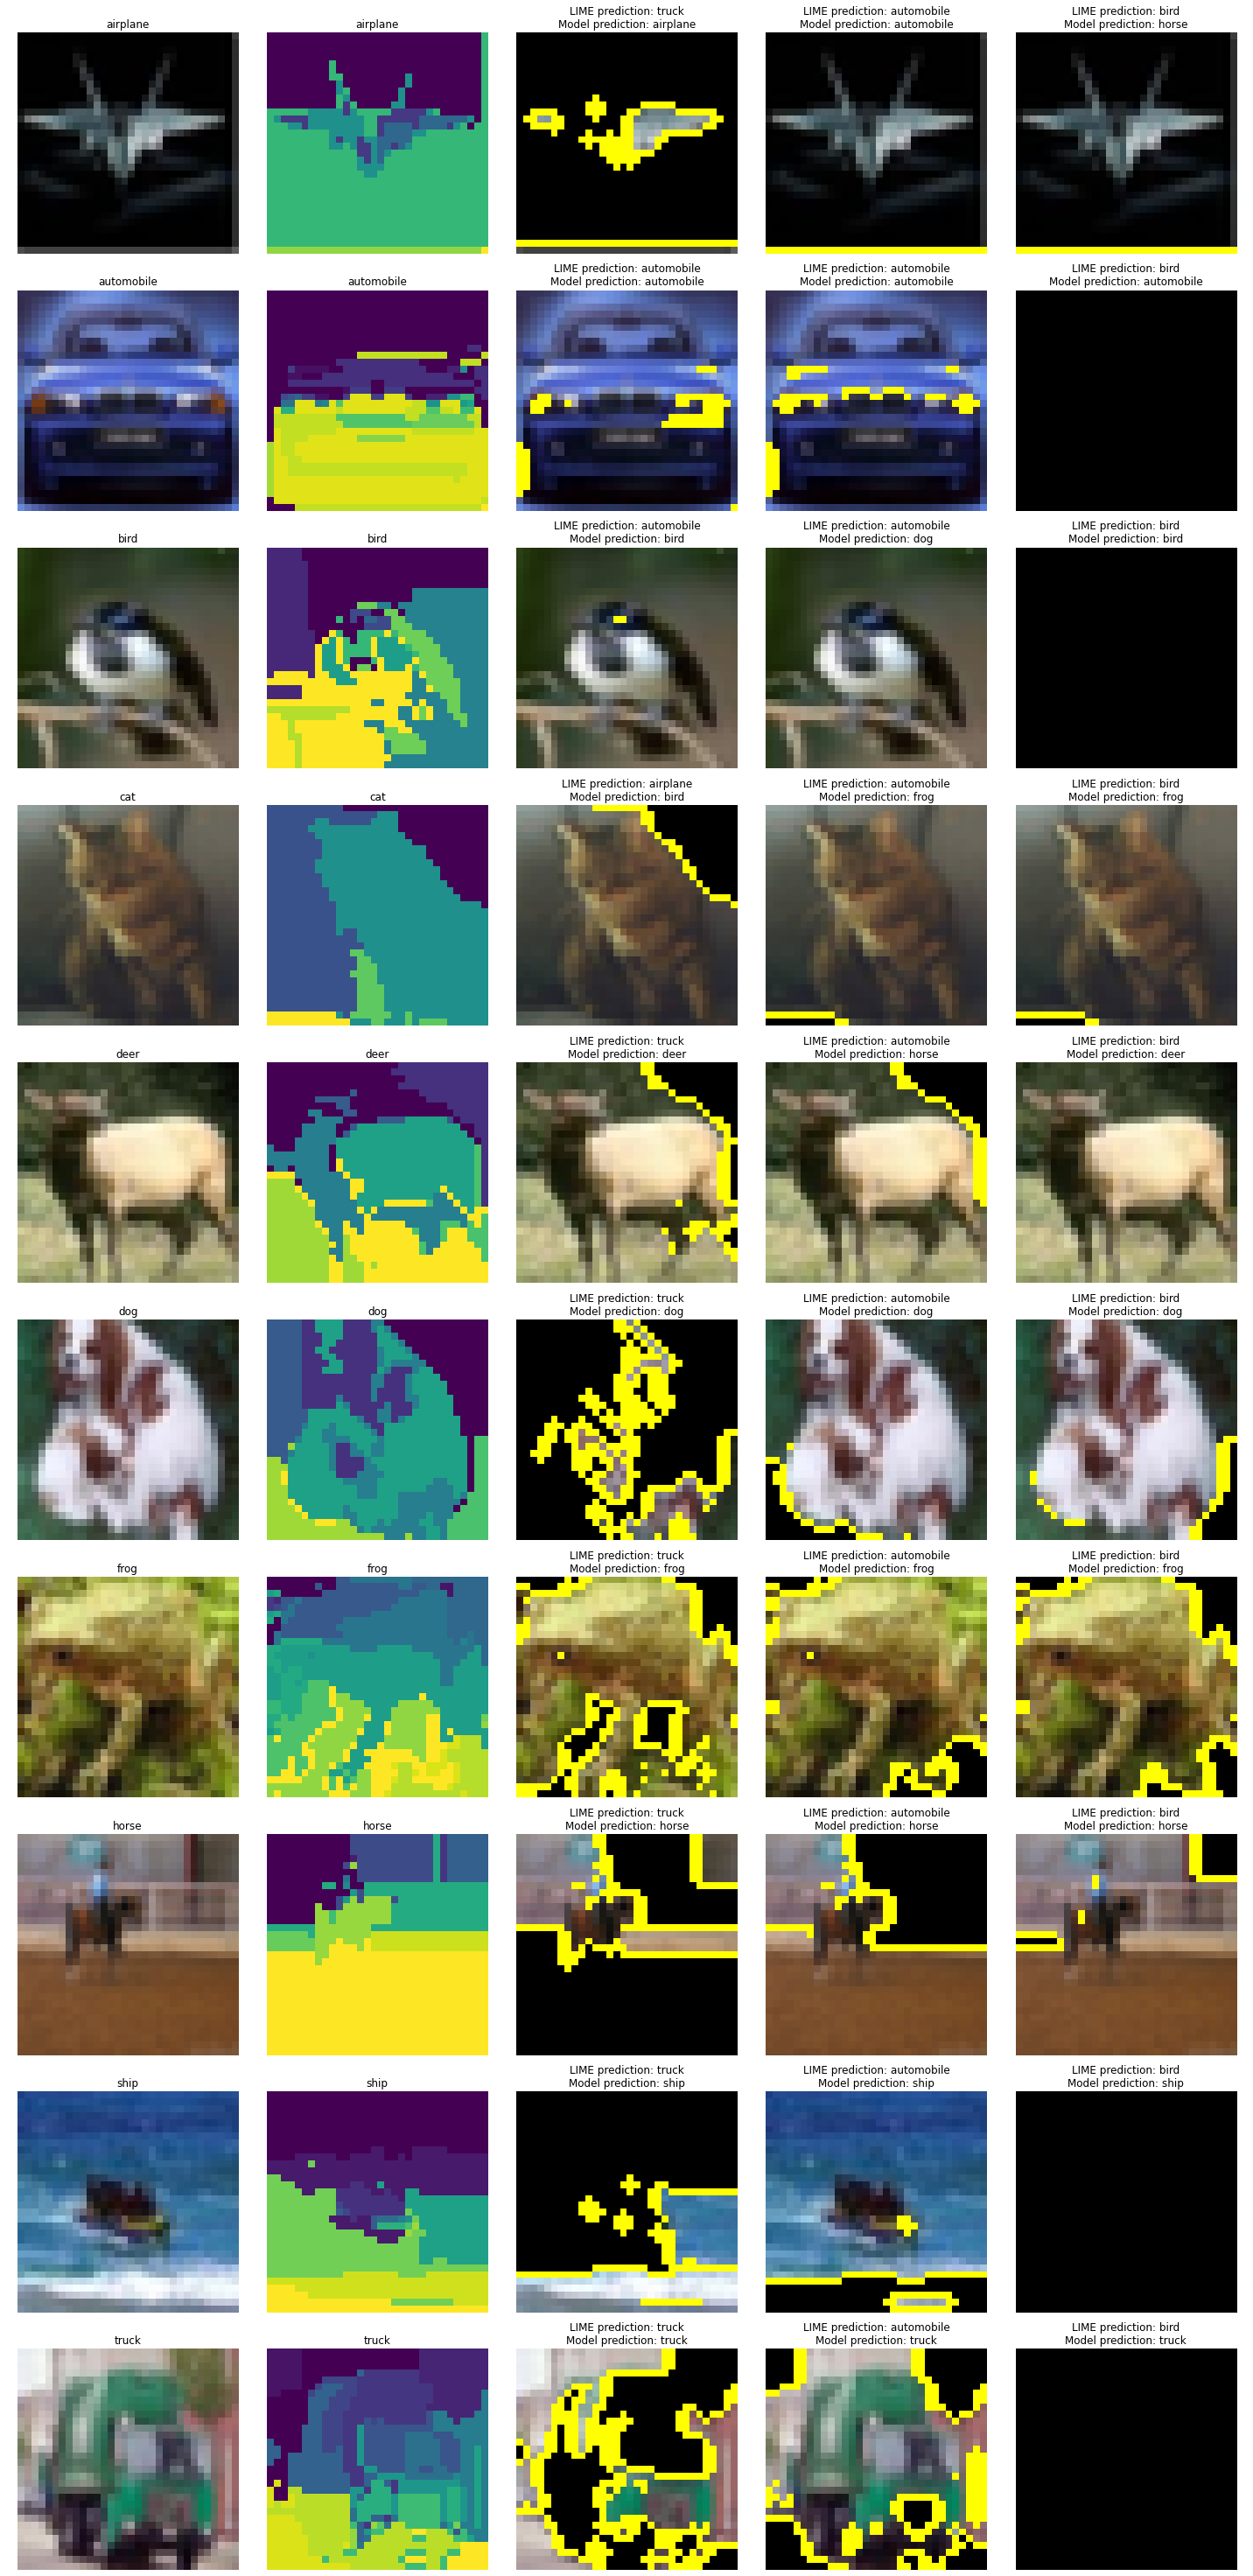

In [276]:
plotLime(images, _, segmentation.quickshift, saving = True, filename = "Limepreds_default_quickshift")

In [259]:
def plotLime(images, labels, seg_fn, saving = False, filename = None):
    mod1preds = testsingleSet(images, labels, model1, loss_fn)
    mod2preds = testsingleSet(images, labels, model2, loss_fn)
    mod3preds = testsingleSet(images, labels, model3, loss_fn)
    figure = plt.figure(figsize = (20,41))
    cols, rows = 5,10
    plt.axis("off")
    #plt.text(.3, 1, 'Segmented image', transform=figure.transFigure, horizontalalignment='center', verticalalignment = "top", in_layout = True)
    #plt.text(.5, 1, 'LIME, model 1', transform=figure.transFigure, horizontalalignment='center', in_layout = True)
    #plt.text(.1, 1, 'Normal image', transform=figure.transFigure, horizontalalignment='center', in_layout = True)
    #plt.text(.7, 1, 'LIME, model 2', transform=figure.transFigure, horizontalalignment='center', in_layout = True)
    #plt.text(.9, 1, 'LIME, model 3', transform=figure.transFigure, horizontalalignment='center', in_layout = True)

    plt.axis("off")
    figure.add_subplot(rows, cols, 1)
    indexes = numpy.unique(labels, return_index = True)
    for i in range(len(indexes[0])):
        imgtitle = indexes[0][i]
        imgnumber = indexes[1][i]
        img = images[imgnumber].mul(255).mT.transpose(0,2).to(dtype = torch.uint8).cpu()
        figure.add_subplot(rows, cols, cols * i+1)

        plt.axis("off")

        plt.title(annotations[int(imgtitle)])
        plt.imshow(img)
        figure.add_subplot(rows, cols, cols * i+2)
        plt.axis("off")
        plt.title(annotations[int(imgtitle)])
        plt.imshow(seg_fn(img))
        figure.add_subplot(rows, cols, cols * i+3)
        plt.axis("off")
        LIMEimage, LIMElabel = LIMEimg(images[imgnumber,], transformeded, 1, seg_fn)
        plt.title("LIME prediction: " +annotations[int(LIMElabel)] + "\nModel prediction: " + annotations[int(np.argmax(mod1preds[imgnumber].cpu()))])
        plt.imshow(LIMEimage)
        figure.add_subplot(rows, cols, cols * i+4)
        plt.axis("off")
        LIMEimage, LIMElabel = LIMEimg(images[imgnumber,], transformeded, 2, seg_fn)
        plt.title("LIME prediction: " +annotations[int(LIMElabel)] + "\nModel prediction: " + annotations[int(np.argmax(mod2preds[imgnumber].cpu()))])
        plt.imshow(LIMEimage)
        figure.add_subplot(rows, cols, cols * i+5)
        plt.axis("off")
        LIMEimage, LIMElabel = LIMEimg(images[imgnumber,], transformeded, 3, seg_fn)
        plt.title("LIME prediction: " +annotations[int(LIMElabel)] + "\nModel prediction: " + annotations[int(np.argmax(mod3preds[imgnumber].cpu()))])
        plt.imshow(LIMEimage)
    figure.tight_layout()
    if(saving == True):
        if(filename != None):
            figure.savefig(filename + ".png")
    plt.show()

In [149]:
#batch = next(iter(test_dataloader))
#images, _ = batch
explainer_1 = lime_image.LimeImageExplainer()
explainer_2 = lime_image.LimeImageExplainer()
explainer_3 = lime_image.LimeImageExplainer()
#images = images.detach().cpu().numpy()
swapped = np.swapaxes(images, 1, -1)
#swapped = np.swapaxes(images, 2, 3)
swapped = swapped[0,:,:,:]
explanation_1 = explainer_1.explain_instance(np.array(transformeded(images[0,])),
                                        batch_predict_1,
                                        top_labels = 10,
                                        num_features = 10,
                                        hide_color = 1,
                                        num_samples = 50,
                                        segmentation_fn = test_quickshift)

explanation_2 = explainer_2.explain_instance(np.array(transformeded(images[0,])),
                                        batch_predict_2,
                                        top_labels = 10,
                                        num_features = 10,
                                        hide_color = 1,
                                        num_samples = 500,
                                        segmentation_fn = test_quickshift)

explanation_3 = explainer_3.explain_instance(np.array(transformeded(images[0,])),
                                        batch_predict_3,
                                        top_labels = 10,
                                        num_features = 10,
                                        hide_color = 1,
                                        num_samples = 5,
                                        segmentation_fn = test_quickshift)

In [135]:
model = model3

In [ ]:
batch = next(iter(test_dataloader))
images, _ = batch

In [ ]:
plt.close()

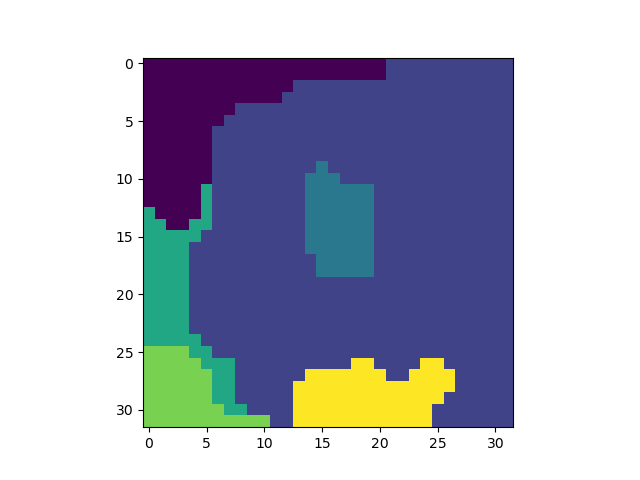

In [24]:
plt.imshow(segmentation.felzenszwalb(transformeded(images[0,]), scale = 300, min_size = 20))


In [25]:
%matplotlib inline

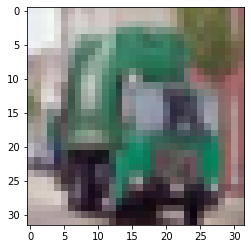

In [26]:
plt.imshow(transformeded(images[0,]))

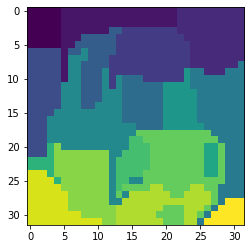

In [102]:
plt.imshow(test_quickshift(transformeded(images[0,])))

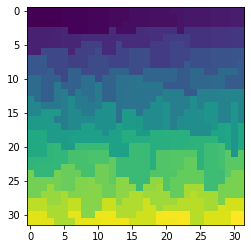

In [100]:

plt.imshow(segmentation.slic(transformeded(images[0,]), start_label = 1))


In [29]:
from skimage.segmentation import mark_boundaries

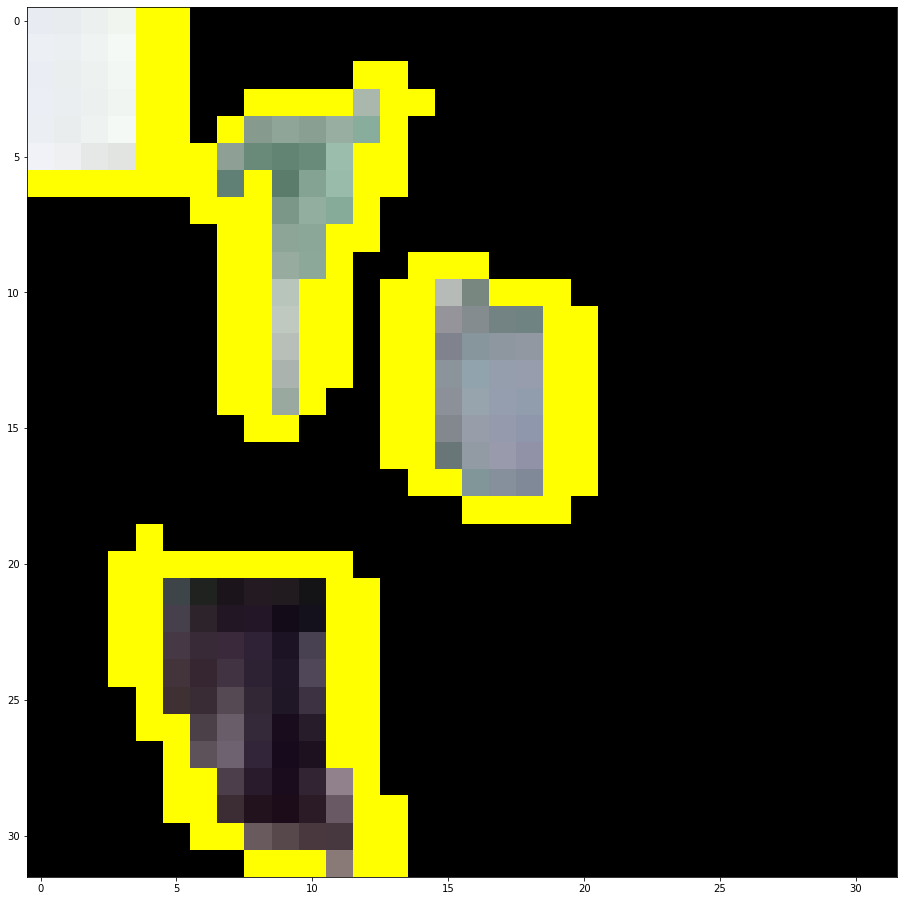

In [30]:
figure = plt.figure(figsize=(16,16))
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], positive_only = True, num_features = 10, hide_rest = True)
img_boundry1 = mark_boundaries(temp/255, mask)
plt.imshow(img_boundry1)


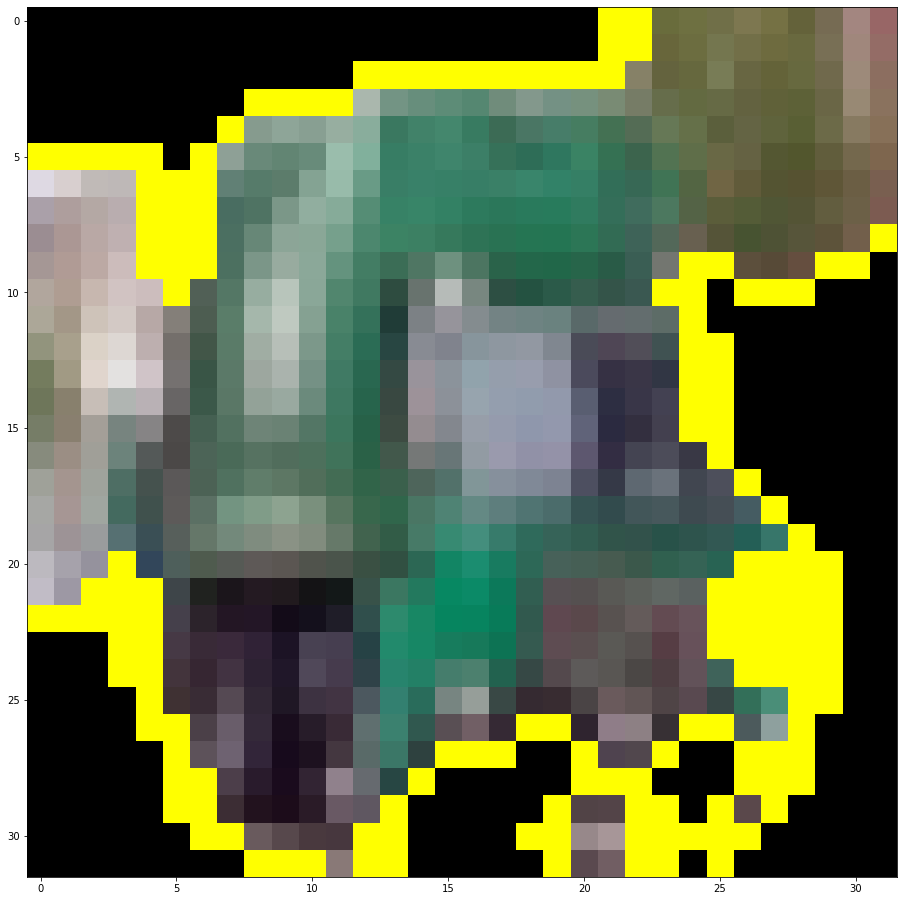

In [31]:
figure = plt.figure(figsize=(16,16))
temp, mask = explanation_2.get_image_and_mask(explanation_2.top_labels[0], positive_only = True, num_features = 10, hide_rest = True)
img_boundry1 = mark_boundaries(temp/255, mask)
plt.imshow(img_boundry1)

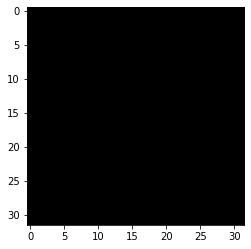

In [32]:
temp, mask = explanation_3.get_image_and_mask(explanation_3.top_labels[0], positive_only = True, num_features = 10, hide_rest = True)
img_boundry1 = mark_boundaries(temp/255, mask)
plt.imshow(img_boundry1)

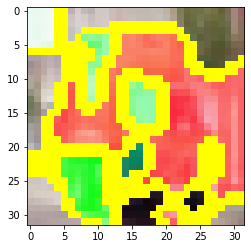

In [33]:
temp, mask = explanation_1.get_image_and_mask(explanation_1.top_labels[0], positive_only = False, num_features = 10, hide_rest = False)
img_boundry2 = mark_boundaries(temp, mask)
plt.imshow(img_boundry2)

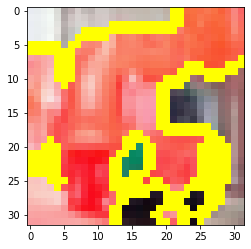

In [34]:
temp, mask = explanation_2.get_image_and_mask(explanation_2.top_labels[3], positive_only = False, num_features = 10, hide_rest = False)
img_boundry2 = mark_boundaries(temp, mask)
plt.imshow(img_boundry2)


In [ ]:
plt.close()

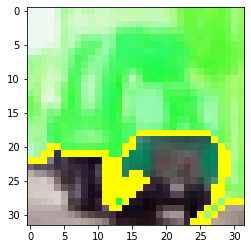

In [35]:
temp, mask = explanation_3.get_image_and_mask(explanation_3.top_labels[0], positive_only = False, num_features = 10, hide_rest = False)
img_boundry2 = mark_boundaries(temp, mask)
plt.imshow(img_boundry2)

In [36]:
testsingleSet(images, _, model1, loss_fn)
testsingleSet(images, _, model2, loss_fn)
testsingleSet(images, _, model3, loss_fn)



Test Error: 
 Accuracy: 76.6%, Avg loss: 0.581198 

Test Error: 
 Accuracy: 57.8%, Avg loss: 1.958168 

Test Error: 
 Accuracy: 75.0%, Avg loss: 0.701930 



[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (54, 54),
 (55, 55),
 (56, 56),
 (57, 57),
 (58, 58),
 (59, 59),
 (60, 60),
 (61, 61),
 (62, 62),
 (63, 63)]

In [344]:
origlist = list(range(0, len(_)))

In [345]:
origlist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63]

In [326]:
len(origlist)

64

In [370]:
indices_to_keep = [i for i in range(_.shape[0]) if i not in indexes] # List of indices that should be kept
kept_ = _[torch.LongTensor(indices_to_keep)]



In [346]:
indexes

array([ 5,  4, 20, 13,  1,  6,  3,  2, 27,  0], dtype=int64)

In [349]:
_[indices_to_keep]

tensor([7, 5, 1, 5, 6, 4, 9, 1, 0, 9, 1, 5, 6, 7, 5, 0, 6, 3, 4, 5, 2, 8, 6, 4,
        8, 9, 6, 2, 8, 7, 7, 1, 4, 2, 9, 1, 5, 0, 1, 0, 9, 2, 5, 3, 0, 5, 8, 7,
        7, 4, 5, 5, 6, 4])

In [350]:
images[[indices_to_keep]].shape

torch.Size([54, 3, 32, 32])

In [309]:
len(images[list(range(0, len(_))) != indexes])

elementwise comparison failed; this will raise an error in the future.


1

['bird', 'frog', 'cat']


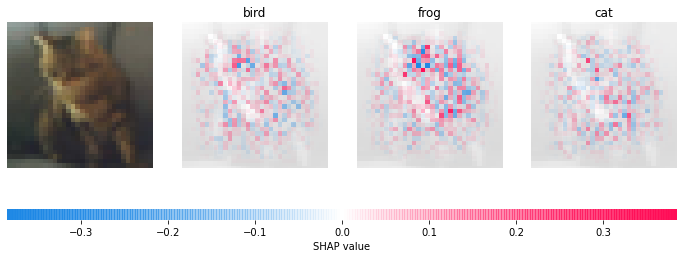

In [450]:
plotShapsOne(images, _, model1, 3)

[['horse', 'automobile', 'bird', 'frog', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], ['airplane', 'truck', 'horse', 'dog', 'horse', 'cat', 'deer', 'deer', 'bird', 'cat'], ['automobile', 'ship', 'dog', 'cat', 'bird', 'horse', 'bird', 'airplane', 'airplane', 'horse']]
[['horse' 'airplane' 'automobile']
 ['automobile' 'truck' 'ship']
 ['bird' 'horse' 'dog']
 ['frog' 'dog' 'cat']
 ['deer' 'horse' 'bird']
 ['dog' 'cat' 'horse']
 ['frog' 'deer' 'bird']
 ['horse' 'deer' 'airplane']
 ['ship' 'bird' 'airplane']
 ['truck' 'cat' 'horse']]


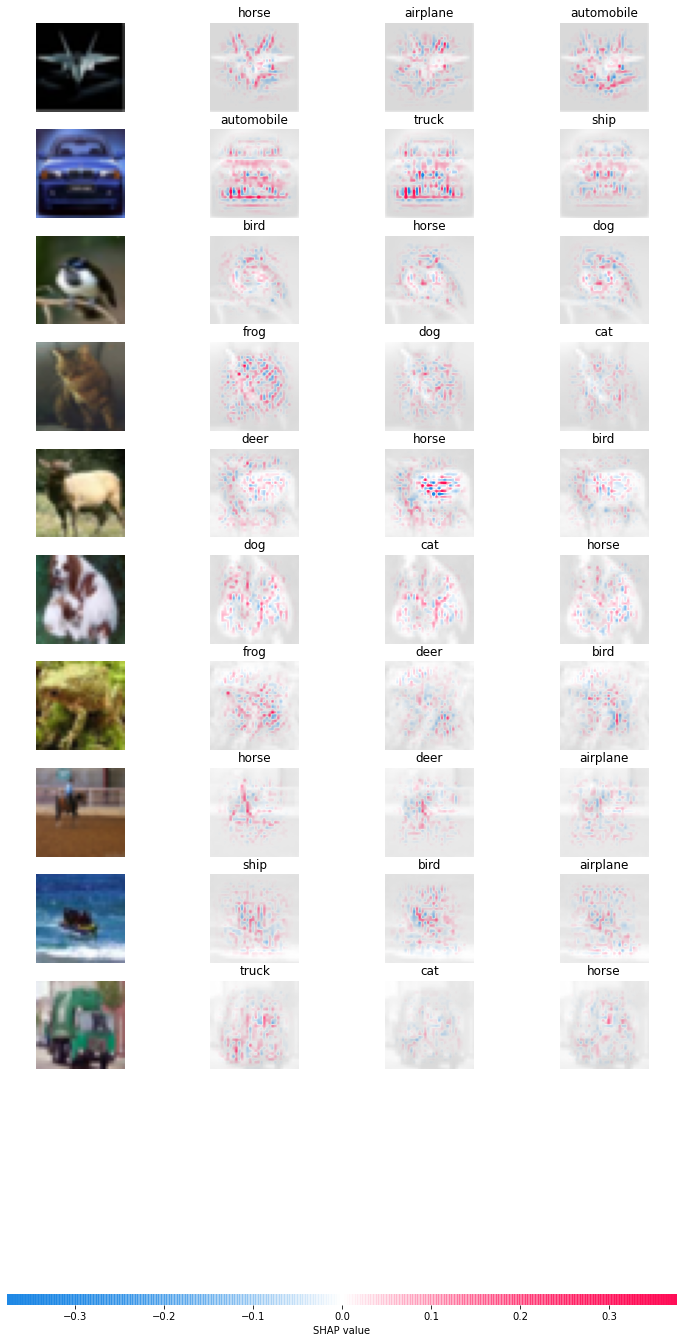

In [460]:
plotShaps(images, _, model3, saving = True, filename = "Shap, model3")

In [377]:
def getShapValues(model, background, test_images):
    explainer = shap.DeepExplainer(model, background)
    shap_values = explainer.shap_values(test_images, ranked_outputs = 3)
    shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values[0]]
    test_numpy = np.swapaxes(np.swapaxes(test_images.detach().cpu().numpy(), 1, 2), -1, 2)
    return shap_values, shap_numpy, test_numpy

In [457]:
def plotShaps(images, labels, model, saving = False, filename = None):
    #figure = plt.figure(figsize = (20,8))
    #cols, rows = 5,2
    #figure.add_subplot(rows, cols, 1)
    indexes = numpy.unique(labels, return_index = True)[1]
    indices_to_keep = [i for i in range(labels.shape[0]) if i not in indexes] # List of indices that should be kept
    background = images[[indices_to_keep]].cuda()
    test_images = images[[indexes]].cuda()
    shap_values, shap_numpy, test_numpy = getShapValues(model = model, background = background, test_images = test_images)
    catsies = []
    nums = shap_values[1].detach().cpu()
    for combo in np.swapaxes(nums, 0 ,1):
        group = []
        for value in combo:
            group.append(annotations[int(value)])
        catsies.append(group)
    
    print(catsies)
    print(np.swapaxes(catsies, 1, 0))
    shap.image_plot(shap_numpy, test_numpy, np.swapaxes(catsies, 0, 1), show = False)
    pic = plt.gcf()
    if(saving == True):
        if(filename != None):
            pic.savefig(filename + ".png")

In [443]:
def plotShapsOne(images, labels, model, single, saving = False, filename = None):
    #figure = plt.figure(figsize = (20,8))
    #cols, rows = 5,2
    #figure.add_subplot(rows, cols, 1)
    indexes = numpy.unique(labels, return_index = True)[1]
    indices_to_keep = [i for i in range(labels.shape[0]) if i not in indexes] # List of indices that should be kept
    background = images[[indices_to_keep]].cuda()
    test_images = images[[indexes[single]]].cuda()
    shap_values, shap_numpy, test_numpy = getShapValues(model = model, background = background, test_images = test_images)
    catsies = []
    nums = shap_values[1].detach().cpu()
    for val in nums[0]:
        catsies.append(annotations[int(val)])
    print(catsies)
    shap.image_plot(shap_numpy, test_numpy, catsies, show = "asd")
    pic = plt.gcf()
    if(saving == True):
        if(filename != None):
            pic = plt.gcf()
            pic.savefig(filename)

In [352]:
pic.savefig("Testifigu.png")

['frog', 'bird', 'dog']


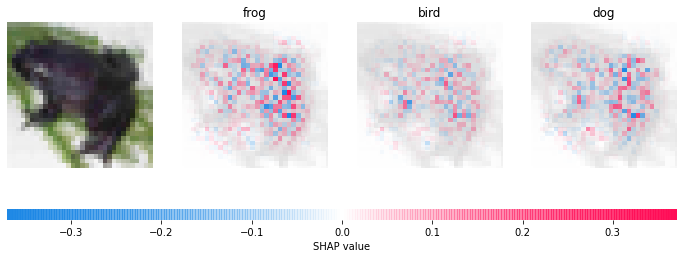

In [431]:
#images = images.cuda()
background = images[:62].cuda()
test_images = images[62:63].cuda()
explainer = shap.DeepExplainer(model3, background)
shap_values = explainer.shap_values(test_images, ranked_outputs = 3)

shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values[0]]
test_numpy = np.swapaxes(np.swapaxes(test_images.detach().cpu().numpy(), 1, 2), -1, 2)
catsies = []
nums = shap_values[1].detach().cpu()
for val in nums[0]:
    catsies.append(annotations[int(val)])
print(catsies)
shap.image_plot(shap_numpy, test_numpy, catsies, show = False)
pic = plt.gcf()
pic.savefig("Testifigu2.png")

TypeError: Image data of dtype object cannot be converted to float

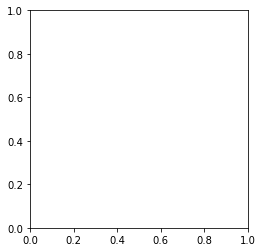

In [362]:
plt.imshow(pic)

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [41]:
teststuff = shap_values[1].detach().cpu()

In [51]:
len(teststuff[0])

3

In [ ]:
shap_values[1]

In [ ]:
pic.set_label(["1","2"])

In [ ]:
annotations

In [ ]:
print(shap_values[1])

In [58]:
len(images[0])

3

In [ ]:
pic.add_subplot(3, 3, 3)

In [59]:
images[0]

tensor([[[0.9098, 0.9098, 0.9255,  ..., 0.4627, 0.6392, 0.5961],
         [0.9255, 0.9216, 0.9373,  ..., 0.4706, 0.6275, 0.5804],
         [0.9176, 0.9176, 0.9294,  ..., 0.4392, 0.6157, 0.5490],
         ...,
         [0.7294, 0.7294, 0.7373,  ..., 0.6784, 0.6627, 0.6510],
         [0.6980, 0.6941, 0.6980,  ..., 0.6471, 0.6235, 0.6039],
         [0.6824, 0.6745, 0.6902,  ..., 0.6706, 0.6392, 0.5882]],

        [[0.9216, 0.9255, 0.9412,  ..., 0.4196, 0.5255, 0.4000],
         [0.9373, 0.9373, 0.9529,  ..., 0.4353, 0.5294, 0.4235],
         [0.9294, 0.9333, 0.9490,  ..., 0.4118, 0.5412, 0.4314],
         ...,
         [0.6784, 0.6745, 0.6863,  ..., 0.6235, 0.6235, 0.6275],
         [0.6392, 0.6353, 0.6392,  ..., 0.6000, 0.5765, 0.5451],
         [0.6118, 0.6078, 0.6235,  ..., 0.5961, 0.5647, 0.5098]],

        [[0.9451, 0.9333, 0.9373,  ..., 0.3255, 0.5020, 0.4000],
         [0.9569, 0.9451, 0.9490,  ..., 0.3333, 0.4863, 0.4000],
         [0.9529, 0.9373, 0.9451,  ..., 0.2980, 0.4784, 0.

In [ ]:
plt.close()

In [92]:
_ == 9

tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [ ]:
# MIETITTÄVÄÄ:
# PLOTTIEN MUOTO: ONKO USEAMPI SEGMENTAATIO VIEREKKÄIN?
# YLEISTYS: TAPA VALITA, MITKÄ KUVAT OTETAAN LISTAAN


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


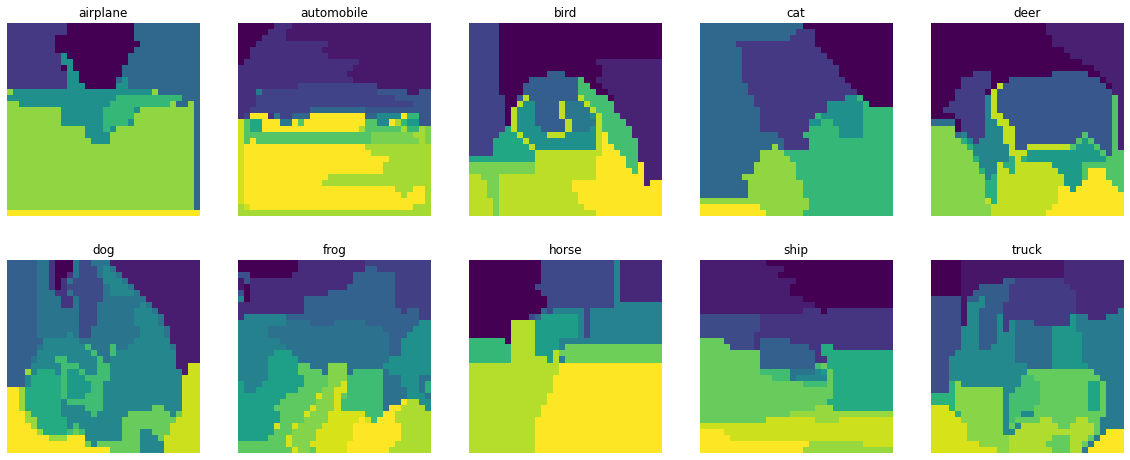

In [132]:
plotSegmentation(images, _, test_quickshift)

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


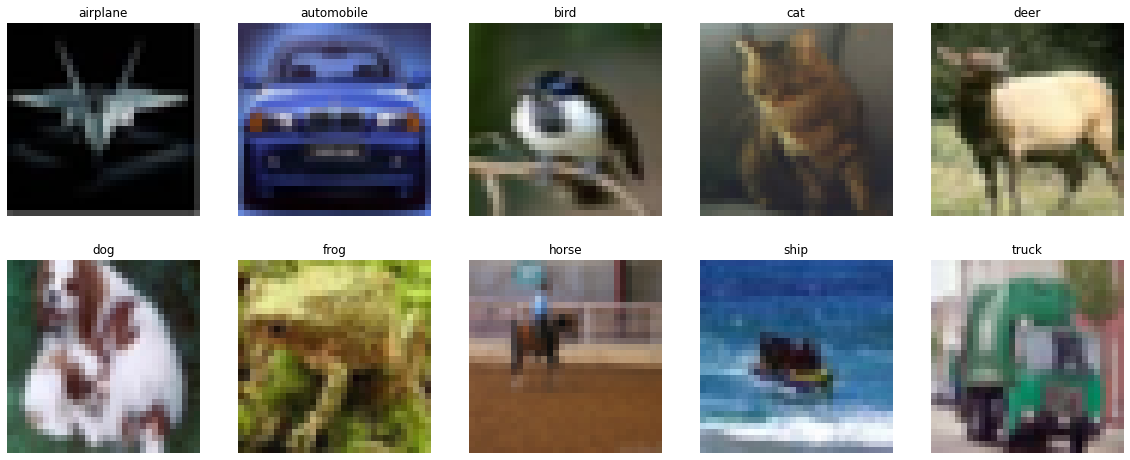

In [298]:
plotNormal(images, _, saving = True, filename = "Regular images with labels")

In [117]:
numpy.unique(_, return_index = True)[0

TypeError: tuple indices must be integers or slices, not tuple

In [277]:
def plotSegmentation(images, labels, seg_fn, saving = False, filename = None):
    figure = plt.figure(figsize = (20,8))
    cols, rows = 5,2
    figure.add_subplot(rows, cols, 1)
    indexes = numpy.unique(labels, return_index = True)
    for i in range(len(indexes[0])):
        imgtitle = indexes[0][i]
        imgnumber = indexes[1][i]
        img = images[imgnumber].mul(255).mT.transpose(0,2).to(dtype = torch.uint8).cpu()
        figure.add_subplot(rows, cols, i+1)
        plt.axis("off")
        plt.title(annotations[int(imgtitle)])
        plt.imshow(seg_fn(img))
    if(saving == True):
        if(filename != None):
            figure.savefig(filename + ".png")
    plt.show()

In [128]:
def plotNormal(images, labels, saving = False, filename = None):
    figure = plt.figure(figsize = (20,8))
    cols, rows = 5,2
    figure.add_subplot(rows, cols, 1)
    indexes = numpy.unique(labels, return_index = True)
    for i in range(len(indexes[0])):
        imgtitle = indexes[0][i]
        imgnumber = indexes[1][i]
        img = images[imgnumber].mul(255).mT.transpose(0,2).to(dtype = torch.uint8).cpu()
        figure.add_subplot(rows, cols, i+1)
        plt.axis("off")
        plt.title(annotations[int(imgtitle)])
        plt.imshow(img)
    if(saving == True):
        if(filename != None):
            figure.savefig(filename + ".png")
    plt.show()

In [ ]:
def plotShap(imgnum, stack = -1):
    figure = plt.figure(figsize=(16,16))
    cols, rows = 4,4
    #img = torch.from_numpy(TESTIMG[stack])[imgnum, [0,1,2], :, :].T.transpose(0,1).mul(255).to(dtype = torch.int).cpu()
    figure.add_subplot(rows, cols, 1)
    plt.axis("off")
    #plt.imshow(img)
    plt.title(annotations[CORRCLASS[stack][imgnum].to().cpu()])
    for i in range(0, 10):
        predtitle = annotations[i]
        img = torch.from_numpy(TEST[stack]).mul(255)[imgnum, [i,i,i], :, :].T.transpose(0,1).to(dtype = torch.uint8).cpu()
        figure.add_subplot(rows, cols, i+2)
        plt.axis("off")
        plt.title(predtitle)
        plt.imshow(img)
    
    prediction = PREDS[stack][imgnum].argmax()
    print(prediction)
    print(imgnum)
    
    img = torch.from_numpy(TEST[stack]).mul(255)[imgnum, [prediction,prediction,prediction], :, :].T.transpose(0,1).to(dtype = torch.uint8).cpu()
    figure.add_subplot(rows, cols, 12)
    plt.axis("off")
    plt.imshow(img)
    plt.title("Predicted: " + annotations[prediction])
    plt.show()

In [ ]:
pic

In [ ]:
test_numpy.type

In [ ]:
PILTransform = transforms.ToPILImage()
test_images2 = PILTransform(test_images[0])

In [ ]:
test_images2 = transforms.ToPILImage(test_images)

In [ ]:
rgbgray(test_images)

In [ ]:
def plotAll(imgnum, stack = -1):
    figure = plt.figure(figsize=(16,16))
    cols, rows = 4,4
    img = torch.from_numpy(TESTIMG[stack])[imgnum, [0,1,2], :, :].T.transpose(0,1).mul(255).to(dtype = torch.int).cpu()
    figure.add_subplot(rows, cols, 1)
    plt.axis("off")
    plt.imshow(img)
    plt.title(annotations[CORRCLASS[stack][imgnum].to().cpu()])
    for i in range(0, 10):
        predtitle = annotations[i]
        img = torch.from_numpy(TEST[stack]).mul(255)[imgnum, [i,i,i], :, :].T.transpose(0,1).to(dtype = torch.uint8).cpu()
        figure.add_subplot(rows, cols, i+2)
        plt.axis("off")
        plt.title(predtitle)
        plt.imshow(img)
    
    prediction = PREDS[stack][imgnum].argmax()
    print(prediction)
    print(imgnum)
    
    img = torch.from_numpy(TEST[stack]).mul(255)[imgnum, [prediction,prediction,prediction], :, :].T.transpose(0,1).to(dtype = torch.uint8).cpu()
    figure.add_subplot(rows, cols, 12)
    plt.axis("off")
    plt.imshow(img)
    plt.title("Predicted: " + annotations[prediction])
    plt.show()

In [ ]:
def plotThem(imgnum, stack = -1):
    prediction = PREDS[stack][imgnum].argmax()
    reality = CORRCLASS[stack][imgnum].to().cpu()
    predtitle = "Predicted: " + annotations[PREDS[stack][imgnum].argmax()]
    realtitle = "Actually: " + annotations[CORRCLASS[stack][imgnum].to().cpu()]
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 2, 2
    img = torch.from_numpy(TESTIMG[stack])[imgnum, [0,1,2], :, :].mul(255).to(dtype = torch.int).cpu()
    figure.add_subplot(rows, cols, 1)
    plt.axis("off")
    plt.title("Original image")
    plt.imshow(img)



    img = torch.from_numpy(TEST[stack]).mul(1)[imgnum, [prediction,prediction,prediction], :, :].T.to(dtype = torch.uint8).cpu()
    figure.add_subplot(rows, cols, 3)
    plt.axis("off")
    plt.title(predtitle)
    plt.imshow(img)
    img = torch.from_numpy(TEST[stack]).mul(1)[imgnum, [reality,reality,reality], :, :].T.to(dtype = torch.uint8).cpu()
    figure.add_subplot(rows, cols, 4)
    plt.axis("off")
    plt.title(realtitle)
    plt.imshow(img)
    plt.show()


In [292]:
def getImgAlpha(img, imgpred):
    imgpred = np.repeat(imgpred, 2, axis = 0)
    imgpred = np.repeat(imgpred, 2, axis = 1)
    imgpred = imgpred / 255
    imgalpha = torch.mul(img, imgpred)
    imgalpha = imgalpha.to(torch.int32)
    return imgalpha

Test Error: 
 Accuracy: 76.6%, Avg loss: 0.581198 

Test Error: 
 Accuracy: 57.8%, Avg loss: 1.958168 

Test Error: 
 Accuracy: 75.0%, Avg loss: 0.701930 



Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


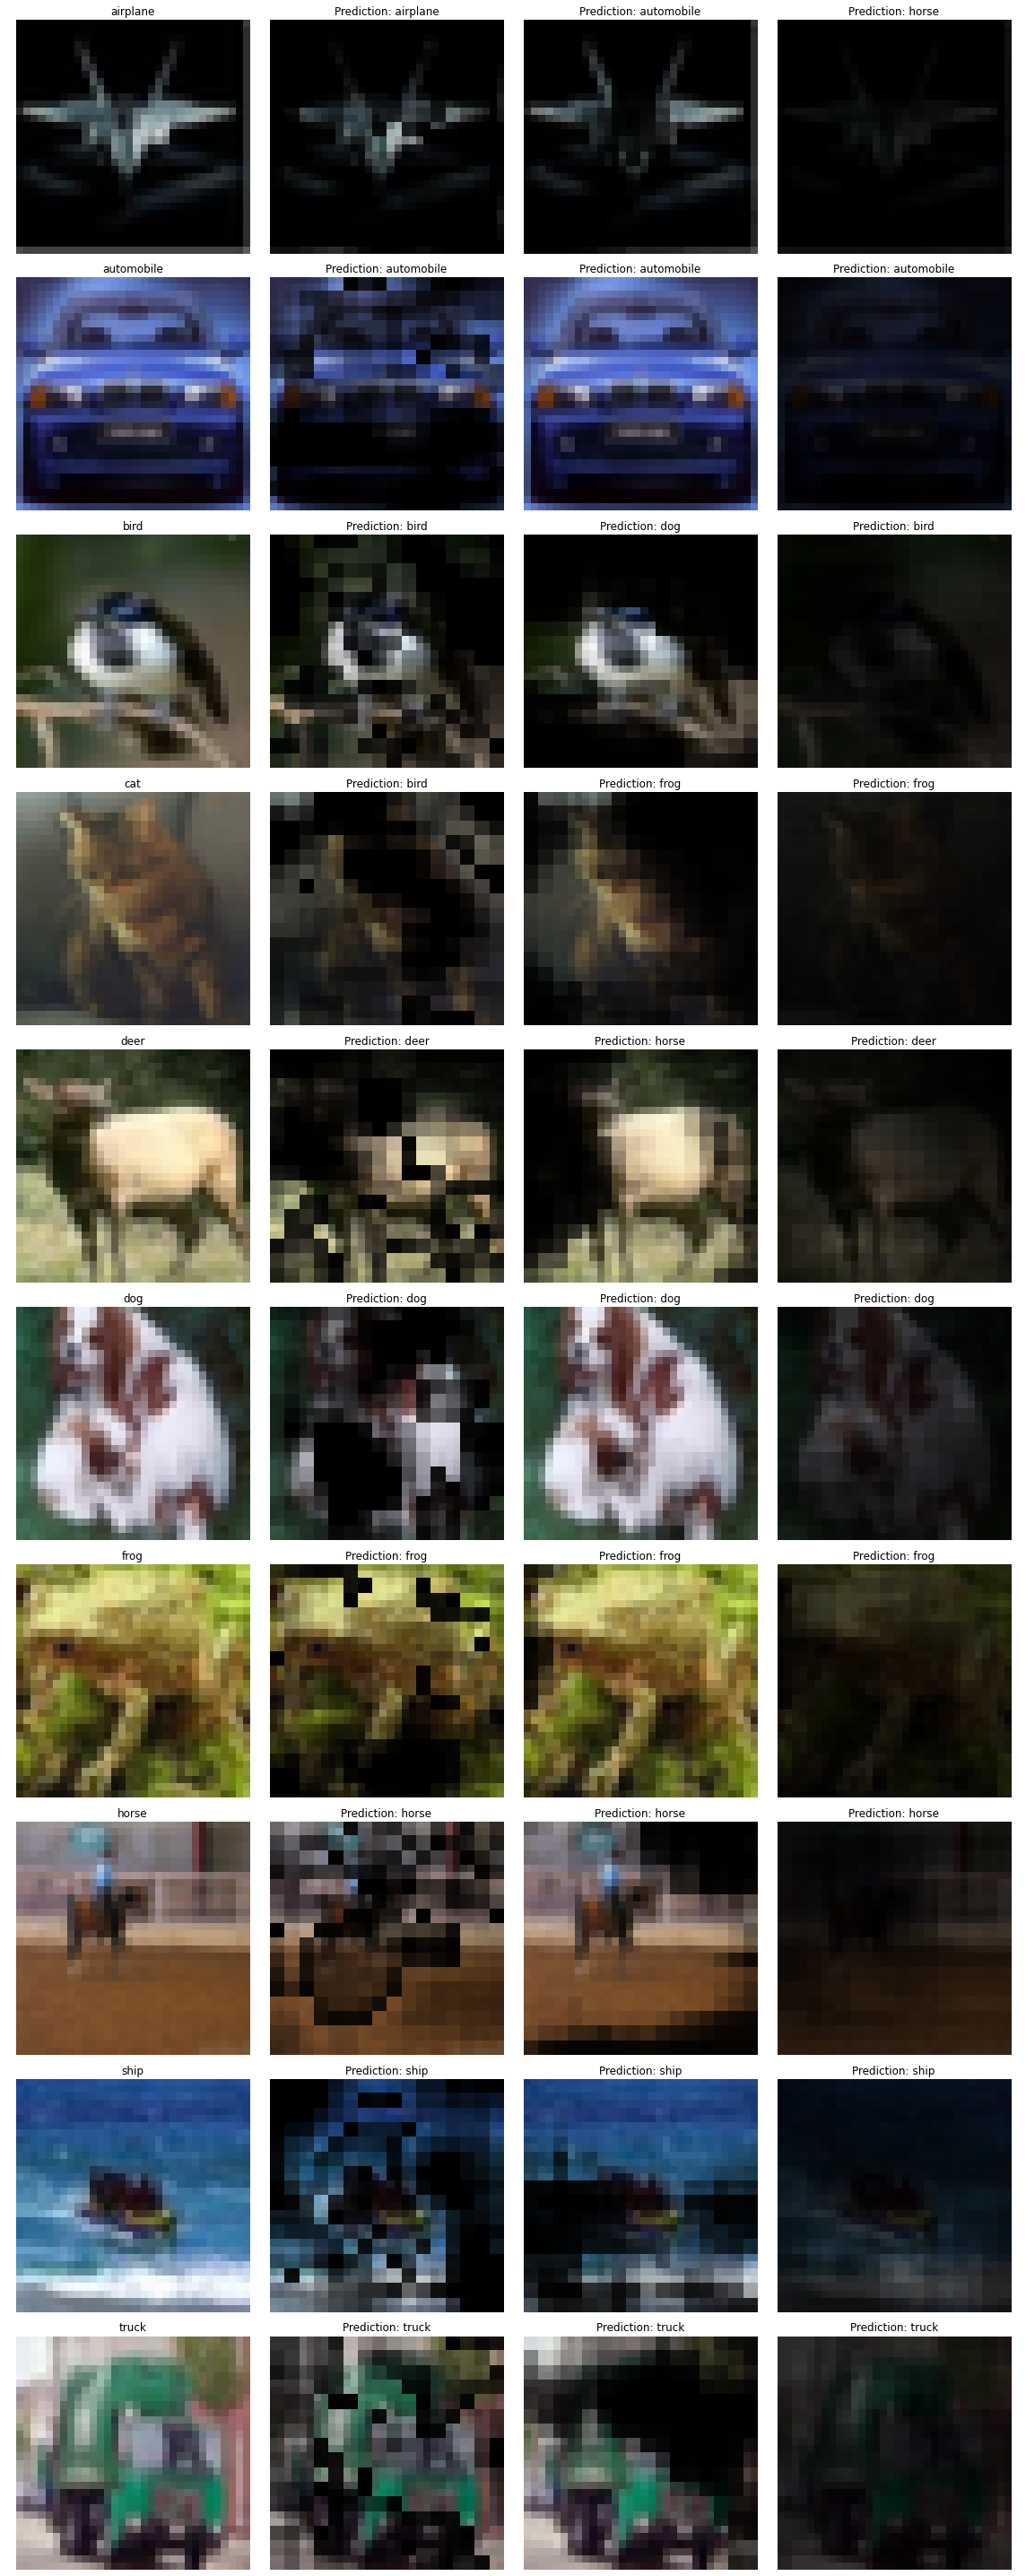

In [297]:
plotPreds(images, _, saving= True, filename="Model_prediction_comparison")

In [296]:
def plotPreds(images, labels, saving = False, filename = None):
    mod1preds = testsingleSet(images, labels, model1, loss_fn)
    mod2preds = testsingleSet(images, labels, model2, loss_fn)
    mod3preds = testsingleSet(images, labels, model3, loss_fn)
    figure = plt.figure(figsize = (16,40))
    cols, rows = 4,10
    plt.axis("off")
    #plt.text(.3, 1, 'Segmented image', transform=figure.transFigure, horizontalalignment='center', verticalalignment = "top", in_layout = True)
    #plt.text(.5, 1, 'LIME, model 1', transform=figure.transFigure, horizontalalignment='center', in_layout = True)
    #plt.text(.1, 1, 'Normal image', transform=figure.transFigure, horizontalalignment='center', in_layout = True)
    #plt.text(.7, 1, 'LIME, model 2', transform=figure.transFigure, horizontalalignment='center', in_layout = True)
    #plt.text(.9, 1, 'LIME, model 3', transform=figure.transFigure, horizontalalignment='center', in_layout = True)

    plt.axis("off")
    figure.add_subplot(rows, cols, 1)
    indexes = numpy.unique(labels, return_index = True)
    for i in range(len(indexes[0])):
        imgtitle = indexes[0][i]
        imgnumber = indexes[1][i]
        img = images[imgnumber].mul(255).mT.transpose(0,2).to(dtype = torch.uint8).cpu()
        figure.add_subplot(rows, cols, cols * i+1)
        plt.axis("off")
        plt.title(annotations[int(imgtitle)])
        plt.imshow(img)
        
        figure.add_subplot(rows, cols, cols * i+2)
        plt.axis("off")
        maxvalue = int(np.argmax(mod1preds[imgnumber].cpu()))
        imgpred = torch.from_numpy(TEST[-3]).mul(255)[imgnumber, [maxvalue, maxvalue, maxvalue],:,:].T.transpose(0,1).to(dtype = torch.uint8).cpu()
        imgalpha = getImgAlpha(img, imgpred)
        plt.title("Prediction: " + annotations[int(maxvalue)])
        plt.imshow(imgalpha)
        
        figure.add_subplot(rows, cols, cols * i+3)
        plt.axis("off")
        maxvalue = int(np.argmax(mod2preds[imgnumber].cpu()))
        imgpred = torch.from_numpy(TEST[-2]).mul(255)[imgnumber, [maxvalue, maxvalue, maxvalue],:,:].T.transpose(0,1).to(dtype = torch.uint8).cpu()
        imgalpha = getImgAlpha(img, imgpred)
        plt.title("Prediction: " + annotations[int(maxvalue)])
        plt.imshow(imgalpha)
        
        figure.add_subplot(rows, cols, cols * i+4)
        plt.axis("off")
        maxvalue = int(np.argmax(mod3preds[imgnumber].cpu()))
        imgpred = torch.from_numpy(TEST[-1]).mul(255)[imgnumber, [maxvalue, maxvalue, maxvalue],:,:].T.transpose(0,1).to(dtype = torch.uint8).cpu()
        imgalpha = getImgAlpha(img, imgpred) * 2
        plt.title("Prediction: " + annotations[int(maxvalue)])
        plt.imshow(imgalpha)
    figure.tight_layout()
    if(saving == True):
        if(filename != None):
            figure.savefig(filename + ".png")
    plt.show()

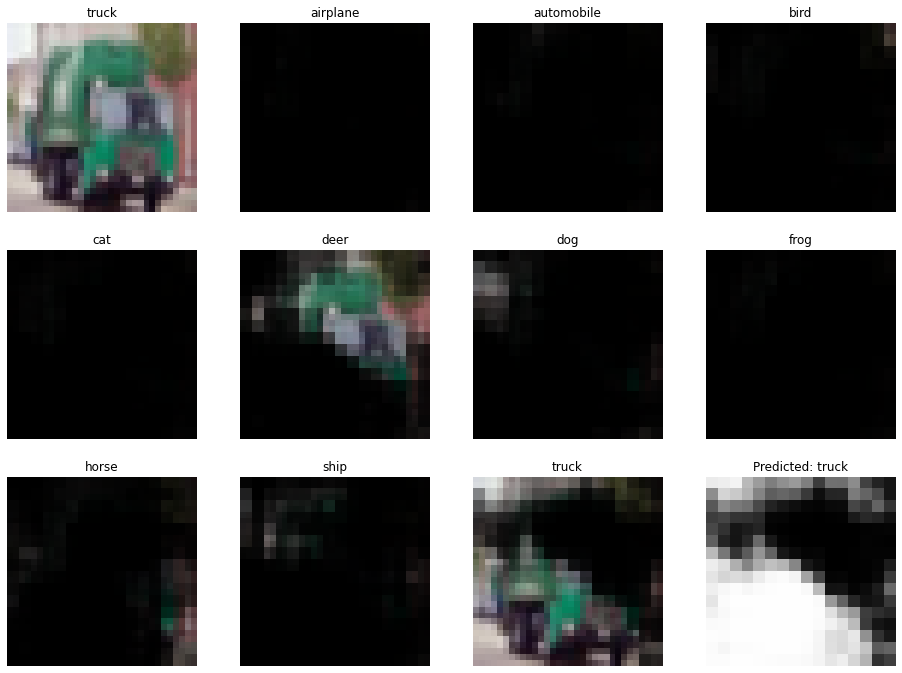

In [286]:
plotAlpha(0, stack = -2)

In [266]:
def plotAlpha(imgnum, stack = -1):
    figure = plt.figure(figsize=(16,16))
    cols, rows = 4,4
    img = torch.from_numpy(TESTIMG[stack])[imgnum, [0,1,2], :, :].T.transpose(0,1).mul(255).to(dtype = torch.int).cpu()
    figure.add_subplot(rows, cols, 1)
    plt.axis("off")
    plt.imshow(img)
    plt.title(annotations[CORRCLASS[stack][imgnum].to().cpu()])
    for i in range(0, 10):
        predtitle = annotations[i]
        imgalpha = torch.from_numpy(TEST[stack]).mul(255)[imgnum, [i,i,i], :, :].T.transpose(0,1).to(dtype = torch.uint8).cpu()
        bigger_img = np.repeat(imgalpha, 2, axis=0)
        bigger_img = np.repeat(bigger_img, 2, axis = 1)
        #bigger_img = bigger_img[:,:,0]
        imgalpha = bigger_img / 255
        #print(torch.max(imgalpha))
        #imgtest = torch.mul(img[:,:,0], imgalpha)
        #imgtest = torch.mul(img[:,:,1], imgalpha)
        #imgtest = torch.mul(img[:,:,2], imgalpha)
        imgtest = torch.mul(img, imgalpha)
        imgtest = imgtest.to(torch.int32)
        #print(imgalpha.shape)
        #print(imgtest.shape)
        figure.add_subplot(rows, cols, i+2)
        plt.axis("off")
        plt.title(predtitle)
        plt.imshow(imgtest)
        
    
    prediction = PREDS[stack][imgnum].argmax()
    
    img = torch.from_numpy(TEST[stack]).mul(255)[imgnum, [prediction,prediction,prediction], :, :].T.transpose(0,1).to(dtype = torch.uint8).cpu()
    figure.add_subplot(rows, cols, 12)
    plt.axis("off")
    plt.imshow(img)
    plt.title("Predicted: " + annotations[prediction])
    plt.show()

In [ ]:
TESTIMG

In [ ]:
plt.imshow(torch.from_numpy(TESTIMG[-1])[0, [0,1,2],:,:].mul(255))

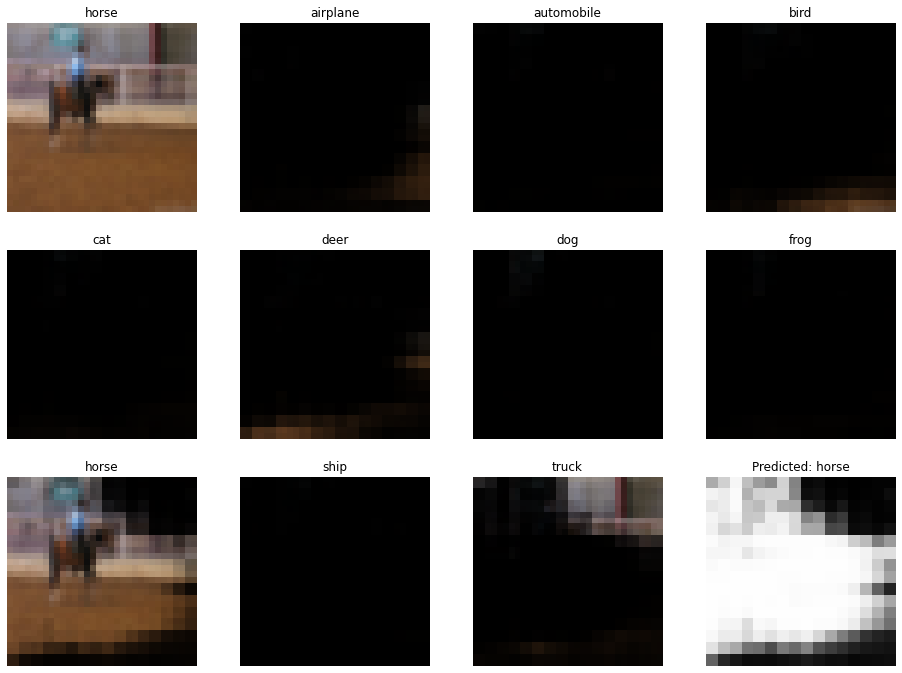

In [270]:
plotAlpha(2, stack = -2)

In [ ]:
len(LINF)

In [ ]:
numpy.max(TEST[0])

In [ ]:
plotAll(2, -3)

In [ ]:
plotAll(9)

In [ ]:
PREDS[-1]

In [ ]:
plotThem(13)

In [110]:
indexes = numpy.unique(_, return_index = True)[1]

10

In [ ]:
model1.state_dict()

In [15]:
torch.save(model1.state_dict(), "Model 1_v2.pth")
torch.save(model2.state_dict(), "Model 2_v2.pth")
torch.save(model3.state_dict(), "Model 3_v2.pth")
print("Saved PyTorch Model State to model #.pth")

Saved PyTorch Model State to model #.pth


In [9]:
model1 = NeuralNetworkBaseline().to(device)
model1.load_state_dict(torch.load("Model 1_v2.pth"))
model2 = NeuralNetworkSoftmax().to(device)
model2.load_state_dict(torch.load("Model 2_v2.pth"))
model3 = NeuralNetworkPoolLinear().to(device)
model3.load_state_dict(torch.load("Model 3_v2.pth"))

RuntimeError: Error(s) in loading state_dict for NeuralNetworkBaseline:
	Missing key(s) in state_dict: "LinLayer1.0.weight", "LinLayer1.0.bias", "LinLayer1.1.running_mean", "LinLayer1.1.running_var", "LinLayer1.3.weight", "LinLayer1.3.bias", "LinLayer1.4.running_mean", "LinLayer1.4.running_var", "LinLayer1.6.weight", "LinLayer1.6.bias". 
	Unexpected key(s) in state_dict: "LinLayer1.7.weight", "LinLayer1.7.bias", "LinLayer1.2.weight", "LinLayer1.2.bias", "LinLayer1.2.running_mean", "LinLayer1.2.running_var", "LinLayer1.2.num_batches_tracked", "LinLayer1.5.weight", "LinLayer1.5.bias", "LinLayer1.5.running_mean", "LinLayer1.5.running_var", "LinLayer1.5.num_batches_tracked". 
	size mismatch for LinLayer1.1.weight: copying a param with shape torch.Size([1200, 2560]) from checkpoint, the shape in current model is torch.Size([1200]).
	size mismatch for LinLayer1.4.weight: copying a param with shape torch.Size([600, 1200]) from checkpoint, the shape in current model is torch.Size([600]).